# DATA 602 Final Project  - ED Stock Analysis

## Introduction

Based on the past, ED (Consolidated Edison) is a very nice stock with steady stock price increasing over time and high annual dividend. Meanwhile I also had very positive trading experienc with ED during the past several years. Recently, ED stock price even broke through \$70 and its current closing price is \$72.74. At present, I am not holding any position of ED. This project will help me gain deep understanding about Consolidated Edison. More importantly, this project is trying to answer the following question: Is now the right time to invest in ED?

## Data Collection
I collect data in two ways:

    1.) Download history stock price from Yahoo Finance
http://www.yahoo.com/finance

    2.) Extract data from company’s seasonal earning reports
http://investor.conedison.com/phoenix.zhtml?c=61493&p=irol-reportsOther

## Data Analysis
### Part I: Analysis of ED Histroy Stock Prices

In [44]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.io.data import DataReader
from datetime import datetime
from __future__ import division
from scipy import stats
import seaborn as sns
sns.set_style('darkgrid')

In [45]:
start = datetime(2005,1,1)
end = datetime(2016,5,28)
ED = DataReader('ED','yahoo',start,end)

In [46]:
ED.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2005-01-03,43.759998,43.910000,43.080002,43.299999,1328900,25.371171
2005-01-04,43.419998,43.590000,43.160000,43.169998,1159700,25.294998
2005-01-05,42.959999,42.980000,42.540001,42.700001,2116200,25.019608
2005-01-06,42.650002,42.849998,42.630001,42.750000,889200,25.048905
2005-01-07,42.980000,43.160000,42.599998,42.869999,873600,25.119217


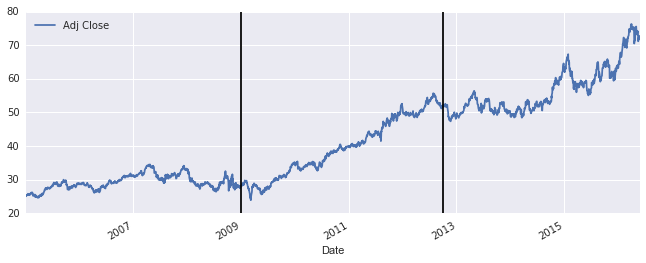

In [165]:
ED['Adj Close'].plot(legend=True,figsize=(11,4))
plt.axvline(x='2009-01-01',color='k')
plt.axvline(x='2012-10-01',color='k')

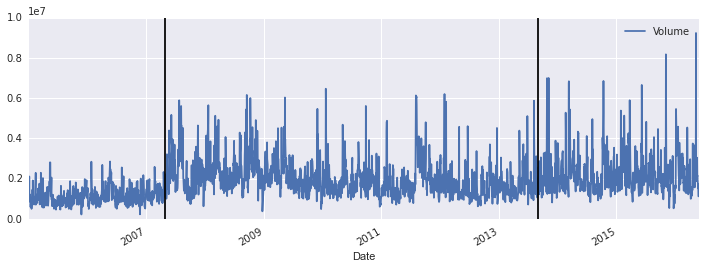

In [115]:
ED['Volume'].plot(legend=True,figsize=(12,4))
plt.axvline(x='2007-05-01',color='k')
plt.axvline(x='2013-09-01',color='k')

In [50]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    ED[column_name]=pd.rolling_mean(ED['Adj Close'],ma)

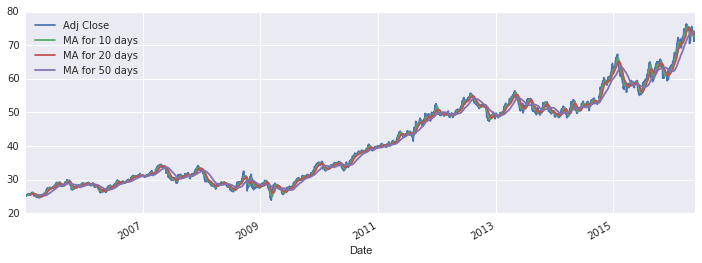

In [51]:
ED[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,4))

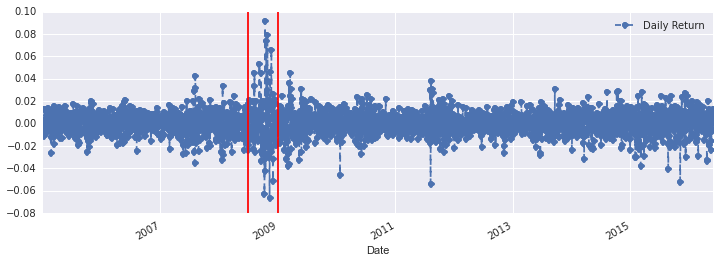

In [119]:
ED['Daily Return'] = ED['Adj Close'].pct_change()

ED['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')
plt.axvline(x='2008-07-01',color='r')
plt.axvline(x='2008-12-31',color='r')

In [120]:
start = datetime(2005,1,1)
end = datetime(2016,5,28)
df = DataReader(['ED','^GSPC'],'yahoo',start,end)['Adj Close']
df.columns = ['ED','SP500']

In [121]:
df.head()

,ED,SP500
Date,,
2005-01-03,25.371171,1202.079956
2005-01-04,25.294998,1188.050049
2005-01-05,25.019608,1183.739990
2005-01-06,25.048905,1187.890015
2005-01-07,25.119217,1186.189941


In [122]:
df_ret = df.pct_change()

In [123]:
df_ret.head()

,ED,SP500
Date,,
2005-01-03,NaN,NaN
2005-01-04,-0.003002,-0.011671
2005-01-05,-0.010887,-0.003628
2005-01-06,0.001171,0.003506
2005-01-07,0.002807,-0.001431


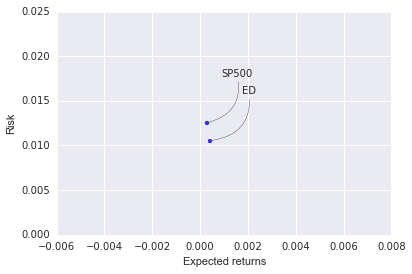

In [126]:
rets =df_ret.dropna()

area = np.pi*5

plt.scatter(rets.mean(), rets.std(),alpha = 0.8,s =area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (45, 45),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.5'))

In [127]:
rets['ED'].quantile(0.05)

-0.015679651288070046

In [128]:
rets['SP500'].quantile(0.05)

-0.018625126494833916

### Part II: Analysis of ED Earning Report Data

In [129]:
ED_er = pd.read_csv('ED_ER.csv',header=True)
ED_er = ED_er.reindex(index=ED_er.index[::-1])

In [130]:
ED_er.head()

,Year,Quarter,TOTAL OPERATING REVENUES,TOTAL OPERATING EXPENSES,OPERATING INCOME,NET INCOME,Net income per common basic share,Net income per common diluted share,DIVIDENDS DECLARED PER COMMON SHARE
55,2005,Q1,2801,2518,283,181,0.75,0.75,0.57
54,2005,Q2,2406,2180,226,115,0.47,0.47,0.57
53,2005,Q3,3375,2956,419,285,1.17,1.16,0.57
52,2005,Q4,3108,2878,230,138,0.56,0.56,0.57
51,2005,Annual,11690,10532,1158,719,2.95,2.94,2.28


In [131]:
ED_er_q = ED_er[ED_er['Quarter']!='Annual']

In [132]:
ED_er_q.head()

,Year,Quarter,TOTAL OPERATING REVENUES,TOTAL OPERATING EXPENSES,OPERATING INCOME,NET INCOME,Net income per common basic share,Net income per common diluted share,DIVIDENDS DECLARED PER COMMON SHARE
55,2005,Q1,2801,2518,283,181,0.75,0.75,0.570
54,2005,Q2,2406,2180,226,115,0.47,0.47,0.570
53,2005,Q3,3375,2956,419,285,1.17,1.16,0.570
52,2005,Q4,3108,2878,230,138,0.56,0.56,0.570
50,2006,Q1,3317,3009,308,181,0.74,0.74,0.575


In [133]:
ED_er_y = ED_er[ED_er['Quarter'] == 'Annual']
ED_er_y = ED_er_y.drop('Quarter', 1)

In [134]:
ED_er_y.head()

,Year,TOTAL OPERATING REVENUES,TOTAL OPERATING EXPENSES,OPERATING INCOME,NET INCOME,Net income per common basic share,Net income per common diluted share,DIVIDENDS DECLARED PER COMMON SHARE
51,2005,11690,10532,1158,719,2.95,2.94,2.28
46,2006,12137,10873,1260,737,2.96,2.95,2.30
41,2007,13120,11725,1395,929,3.48,3.46,2.32
36,2008,13583,12175,1408,1196,3.37,3.36,2.34
31,2009,13032,11257,1774,879,3.16,3.14,2.36


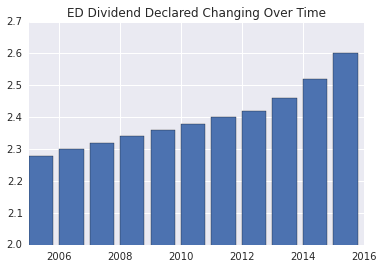

In [152]:
plt.bar(ED_er_y['Year'],ED_er_y['DIVIDENDS DECLARED PER COMMON SHARE'])
plt.xlim([2005,2016])
plt.ylim([2.0,2.7])
plt.title('ED Dividend Declared Changing Over Time')

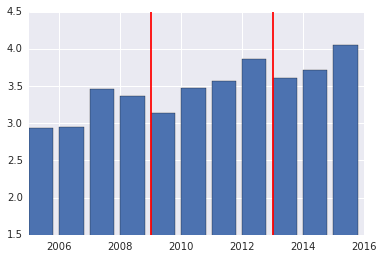

In [157]:
plt.bar(ED_er_y['Year'],ED_er_y['Net income per common diluted share'])
plt.xlim([2005,2016])
plt.ylim([1.5,4.5])
plt.axvline(x='2009',color='r')
plt.axvline(x='2013',color='r')

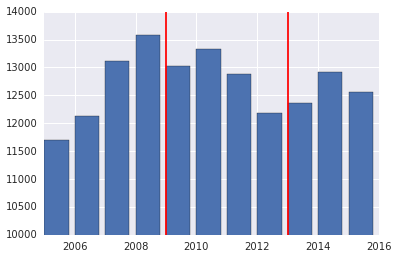

In [163]:
plt.bar(ED_er_y['Year'],ED_er_y['TOTAL OPERATING REVENUES'])
plt.xlim([2005,2016])
plt.ylim([10000,14000])
plt.axvline(x='2009',color='r')
plt.axvline(x='2013',color='r')

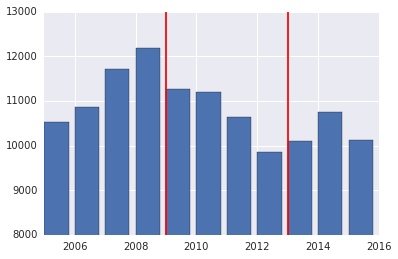

In [160]:
plt.bar(ED_er_y['Year'],ED_er_y['TOTAL OPERATING EXPENSES'])
plt.xlim([2005,2016])
plt.ylim([8000,13000])
plt.axvline(x='2009',color='r')
plt.axvline(x='2013',color='r')

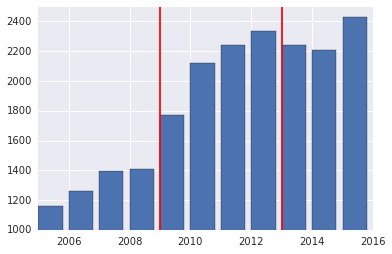

In [161]:
plt.bar(ED_er_y['Year'],ED_er_y['OPERATING INCOME'])
plt.xlim([2005,2016])
plt.ylim([1000,2500])
plt.axvline(x='2009',color='r')
plt.axvline(x='2013',color='r')

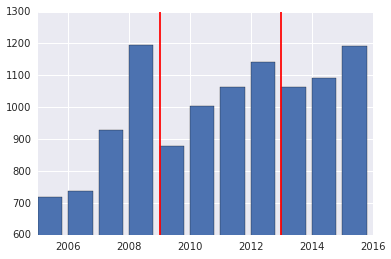

In [162]:
plt.bar(ED_er_y['Year'],ED_er_y['NET INCOME'])
plt.xlim([2005,2016])
plt.ylim([600,1300])
plt.axvline(x='2009',color='r')
plt.axvline(x='2013',color='r')

In [72]:
ED_er_q.head()

,Year,Quarter,TOTAL OPERATING REVENUES,TOTAL OPERATING EXPENSES,OPERATING INCOME,NET INCOME,Net income per common basic share,Net income per common diluted share,DIVIDENDS DECLARED PER COMMON SHARE
55,2005,Q1,2801,2518,283,181,0.75,0.75,0.570
54,2005,Q2,2406,2180,226,115,0.47,0.47,0.570
53,2005,Q3,3375,2956,419,285,1.17,1.16,0.570
52,2005,Q4,3108,2878,230,138,0.56,0.56,0.570
50,2006,Q1,3317,3009,308,181,0.74,0.74,0.575


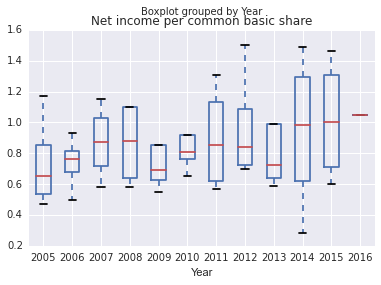

In [73]:
ED_er_q.boxplot('Net income per common basic share',by='Year')

In [74]:
y_1 = ED_er_q['Net income per common basic share'][ED_er_q['Year'].isin([2013,2014,2015,2016])]
y_2 = ED_er_q['Net income per common basic share'][ED_er_q['Year'].isin([2009,2010,2011,2012])]
y_3 = ED_er_q['Net income per common basic share'][ED_er_q['Year'].isin([2005,2006,2007,2008])]

In [75]:
F, p = stats.f_oneway(y_1,y_2,y_3)

In [76]:
print(F,p)

(0.89702850313657101, 0.41544767418103101)


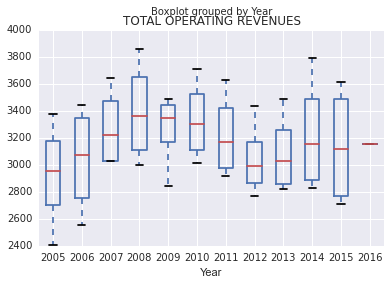

In [77]:
ED_er_q.boxplot('TOTAL OPERATING REVENUES',by='Year')

In [78]:
y_1 = ED_er_q['TOTAL OPERATING REVENUES'][ED_er_q['Year'].isin([2013,2014,2015,2016])]
y_2 = ED_er_q['TOTAL OPERATING REVENUES'][ED_er_q['Year'].isin([2009,2010,2011,2012])]
y_3 = ED_er_q['TOTAL OPERATING REVENUES'][ED_er_q['Year'].isin([2005,2006,2007,2008])]
F, p = stats.f_oneway(y_1,y_2,y_3)
print(F,p)

(0.14486287042167878, 0.86557131737720283)


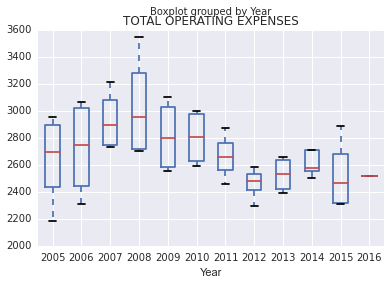

In [79]:
ED_er_q.boxplot('TOTAL OPERATING EXPENSES',by='Year')

In [80]:
y_1 = ED_er_q['TOTAL OPERATING EXPENSES'][ED_er_q['Year'].isin([2013,2014,2015,2016])]
y_2 = ED_er_q['TOTAL OPERATING EXPENSES'][ED_er_q['Year'].isin([2009,2010,2011,2012])]
y_3 = ED_er_q['TOTAL OPERATING EXPENSES'][ED_er_q['Year'].isin([2005,2006,2007,2008])]
F, p = stats.f_oneway(y_1,y_2,y_3)
print(F,p)

(2.9664568447446062, 0.062362667822908092)


In [81]:
stats.ttest_ind(y_1,y_2)

(-1.2513357665363074, 0.2215459193930655)

In [82]:
stats.ttest_ind(y_1,y_3)

(-2.2332954275691699, 0.034012898403855026)

In [83]:
stats.ttest_ind(y_3,y_2)

(1.3627246307120415, 0.1831119727300341)

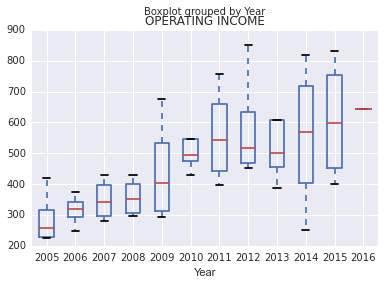

In [84]:
ED_er_q.boxplot('OPERATING INCOME',by='Year')

In [85]:
y_1 = ED_er_q['OPERATING INCOME'][ED_er_q['Year'].isin([2013,2014,2015,2016])]
y_2 = ED_er_q['OPERATING INCOME'][ED_er_q['Year'].isin([2009,2010,2011,2012])]
y_3 = ED_er_q['OPERATING INCOME'][ED_er_q['Year'].isin([2005,2006,2007,2008])]
F, p = stats.f_oneway(y_1,y_2,y_3)
print(F,p)

(12.636639510276213, 5.0528984717311369e-05)


In [86]:
stats.ttest_ind(y_1,y_2)

(0.75748353624426989, 0.45532070473807607)

In [87]:
stats.ttest_ind(y_1,y_3)

(4.824274616422219, 4.8842708488948679e-05)

In [88]:
stats.ttest_ind(y_3,y_2)

(-4.7398785268127464, 4.8518405234373955e-05)

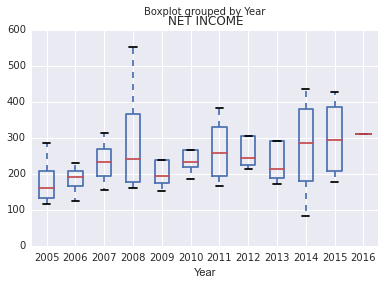

In [89]:
ED_er_q.boxplot('NET INCOME',by='Year')

In [90]:
y_1 = ED_er_q['NET INCOME'][ED_er_q['Year'].isin([2013,2014,2015,2016])]
y_2 = ED_er_q['NET INCOME'][ED_er_q['Year'].isin([2009,2010,2011,2012])]
y_3 = ED_er_q['NET INCOME'][ED_er_q['Year'].isin([2005,2006,2007,2008])]
F, p = stats.f_oneway(y_1,y_2,y_3)
print(F,p)

(1.1113790531983829, 0.33858893818720703)


### Part III: Monte Carlo simulation 

In [91]:
def get_price(days,mu,sigma,price_start):
    """A function for getting stock price after days by simulation.
    
    input:
        days: the number of days for simulation
        mu: the mean of history stock prices
        sigma: the standard deviation of history stock prices
        price_start: the stock price for starting the simulation
    
    output:
        the stock price in days
    """
    p = np.random.normal(mu,sigma,days)
    Price = [price_start]
    for i in range(days-1):
        price = Price[i]*(1+p[i+1])
        Price.append(price)
    return(Price[days-1])

In [95]:
df['ED'].tail(1)

Date
2016-05-27    72.739998
Name: ED, dtype: float64

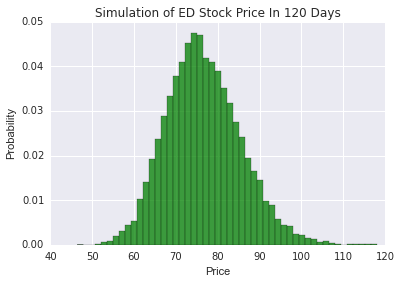

In [96]:
mu = rets.mean()['ED']
sigma = rets.std()['ED']
start_price = 72.74

n=10000
result = []

for i in range(n):
    price = get_price(120,mu,sigma,start_price)
    result.append(price)

n, bins, patches = plt.hist(result, 50, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Price')
plt.ylabel('Probability')
plt.title('Simulation of ED Stock Price In 120 Days')

In [97]:
final_result = round(np.percentile(result, 1),1)
print('The VaR with 99% confidence is ${}').format(final_result)

The VaR with 99% confidence is $58.2


In [98]:
rets.head()

,ED,SP500
Date,,
2005-01-04,-0.003002,-0.011671
2005-01-05,-0.010887,-0.003628
2005-01-06,0.001171,0.003506
2005-01-07,0.002807,-0.001431
2005-01-10,0.012829,0.003423


In [99]:
ret1 = rets['20080101':'20081231']
ret2 = rets['20120101':'20121231']
frames = [ret1,ret2]
rets_new = pd.concat(frames)

In [100]:
rets_new.head()

,ED,SP500
Date,,
2008-01-02,-0.014944,-0.014438
2008-01-03,-0.001247,0.000000
2008-01-04,-0.002913,-0.024552
2008-01-07,0.014190,0.003223
2008-01-08,-0.005556,-0.018352


In [101]:
rets_new.tail()

,ED,SP500
Date,,
2012-12-24,-0.001427,-0.002440
2012-12-26,-0.009112,-0.004787
2012-12-27,-0.000721,-0.001218
2012-12-28,-0.008842,-0.011050
2012-12-31,0.011105,0.016942


In [102]:
mu_new = rets_new.mean()['ED']
sigma_new = rets_new.std()['ED']

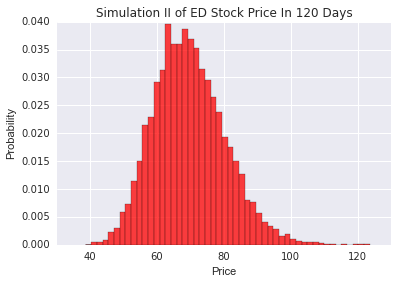

In [103]:
n=10000
result = []

for i in range(n):
    price = get_price(120,mu_new,sigma_new,start_price)
    result.append(price)

n, bins, patches = plt.hist(result, 50, normed=1, facecolor='red', alpha=0.75)
plt.xlabel('Price')
plt.ylabel('Probability')
plt.title('Simulation II of ED Stock Price In 120 Days')

In [104]:
final_result = round(np.percentile(result, 1),1)
print('The VaR with 99% confidence is ${}').format(final_result)

The VaR with 99% confidence is $48.2
